In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

     run_1  run_2  run_3  run_4  run_5
0      NaN    NaN    NaN    NaN    NaN
1      NaN    NaN    NaN    NaN    NaN
2      NaN    NaN    NaN    NaN    NaN
3      NaN    NaN    NaN    NaN    NaN
4      NaN    NaN    NaN    NaN    NaN
..     ...    ...    ...    ...    ...
260    0.0    NaN    NaN    0.0    NaN
261    0.0    NaN    NaN    0.0    NaN
262    0.0    NaN    NaN    0.0    NaN
263    0.0    NaN    NaN    NaN    NaN
264    0.0    NaN    NaN    NaN    NaN

[265 rows x 5 columns]


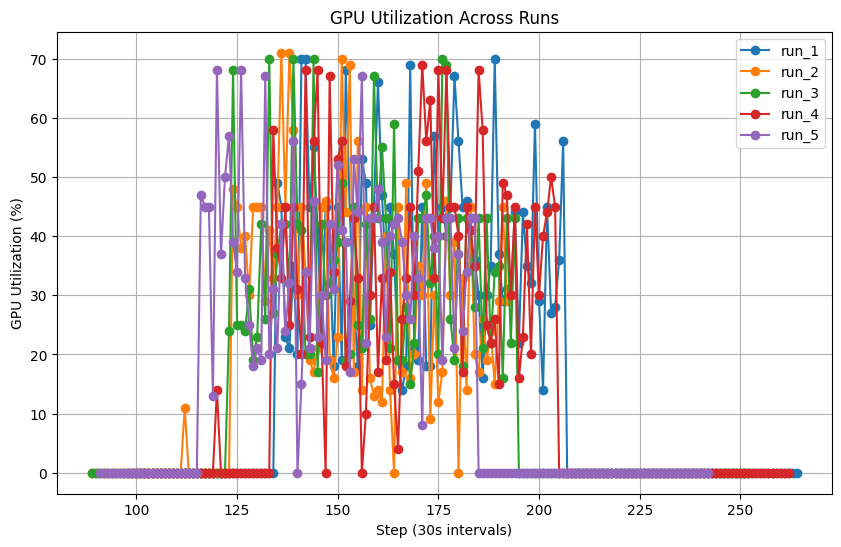

In [24]:
# GPU Utilization Auto

path = "./data/auto/gpu-utilization"

# Load all CSV files
csv_files = glob.glob(path + "/*.csv")

dfs = [pd.read_csv(file, usecols=["GPU 0"]) for file in csv_files]

# clean
for i, df in enumerate(dfs):
    dfs[i]["GPU 0"] = (
        df["GPU 0"]
        .astype(str)
        .str.replace("%", "", regex=False)
        .replace("", 0)
        .astype(float)
    )


combined = pd.concat(dfs, axis=1)
combined.columns = [f"run_{i + 1}" for i in range(len(dfs))]
combined.fillna(0)
print(combined)


plt.figure(figsize=(10,6))

for col in combined.columns:
    plt.plot(combined.index, combined[col], marker="o", label=col)

plt.xlabel("Step (30s intervals)")
plt.ylabel("GPU Utilization (%)")
plt.title("GPU Utilization Across Runs")
plt.legend()
plt.grid(True)
plt.show()

